In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model_structure import Rate, Emission, Model, create_model, add_emissions
from model_structure import eigen_analysis_plot
from global_model import global_compartments, global_atmospheres, global_lands, global_oceans
from global_model import atmosphere_rates, river_rates
from global_model import ocean_sinking_rates, ocean_circulation_rates, terrestrial_rates

In [2]:
rates = atmosphere_rates + river_rates + ocean_sinking_rates + ocean_circulation_rates + terrestrial_rates

In [3]:
emissions = []

# Anthropogenic
for sector in ['fertilizer','mobile','oil','waste','metals','coal']:
    # mobile Oceania missing
    df = pd.read_csv(f'emis/{sector}.csv')
    for atm_name in global_atmospheres:
        region = atm_name[:-4]
        emissions.append(Emission(f'{region} {sector}', df[region].values, df['Year'].values, atm_name))
        
# Natural
natemis = np.zeros(len(global_compartments))
natural_emissions = {'AfricaMidEast_atm':100, 'Asia_atm': 280, 'Europe_atm': 250,
                      'NorthAmer_atm': 16, 'Oceania_atm': 12, 'SouthAmer_atm': 16, 'USSR_atm': 0.8}
for atm_name in natural_emissions:
    i = global_compartments.index(atm_name)
    emis = natural_emissions[atm_name]
    natemis[i] = emis
    emissions.append(Emission(f'{atm_name} natural', emis, None, atm_name))

In [4]:
model = create_model(global_compartments, rates)
model = add_emissions(model, emissions)

Meq = model.get_steady_state(natemis)

In [5]:
model.choose_emis_to_use('all')
reservoirs, times = model.run(1800, 2020, initial_conditions=Meq)
EFs = reservoirs/np.mean(reservoirs[5000:13000,:],axis=0) #1850-1930

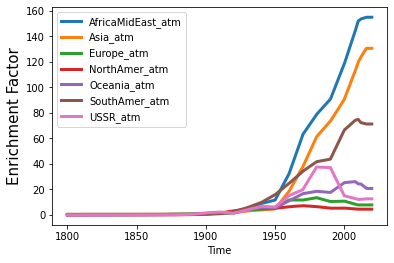

In [6]:
for comp in global_atmospheres:
    i = global_compartments.index(comp)
    plt.plot(times, EFs[:,i], lw=3, label=comp)
plt.xlabel("Time"); plt.ylabel("Enrichment Factor",fontsize=15);
plt.legend();

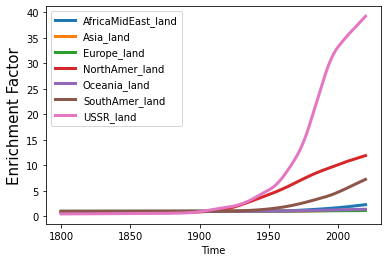

In [7]:
for comp in global_lands:
    i = global_compartments.index(comp)
    plt.plot(times, EFs[:,i], lw=3, label=comp)
plt.xlabel("Time"); plt.ylabel("Enrichment Factor",fontsize=15);
plt.legend();

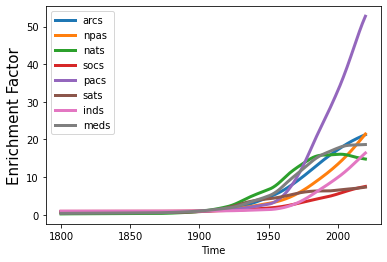

In [8]:
for comp in global_oceans[::2]:
    i = global_compartments.index(comp)
    plt.plot(times, EFs[:,i], lw=3, label=comp)
plt.xlabel("Time"); plt.ylabel("Enrichment Factor",fontsize=15);
plt.legend();

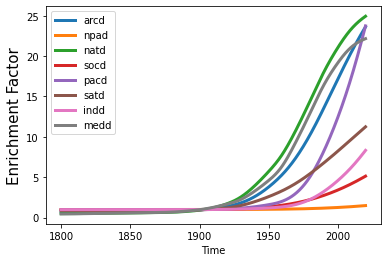

In [9]:
for comp in global_oceans[1::2]:
    i = global_compartments.index(comp)
    plt.plot(times, EFs[:,i], lw=3, label=comp)
plt.xlabel("Time"); plt.ylabel("Enrichment Factor",fontsize=15);
plt.legend();

In [10]:
print("Lifetimes!")
for name,rate in model.rates.items():
    print(f'{name}: {1/rate.k:.3f} years')

Lifetimes!
Asia deposition: 0.035 years
Europe deposition: 0.030 years
NorthAmer deposition: 0.036 years
Oceania deposition: 0.055 years
SouthAmer deposition: 0.039 years
USSR deposition: 0.039 years
AfricaMidEast deposition: 0.053 years
NorthAmer to nats deposition: 0.857 years
NorthAmer to sats deposition: 2.117 years
NorthAmer to npas deposition: 2.117 years
SouthAmer to pacs deposition: 2.186 years
SouthAmer to sats deposition: 6.559 years
Europe to nats deposition: 0.152 years
Europe to meds deposition: 0.461 years
Asia to npas deposition: 0.618 years
Asia to pacs deposition: 0.618 years
Asia to inds deposition: 1.215 years
Oceania to socs deposition: 2.741 years
Oceania to pacs deposition: 2.741 years
Oceania to inds deposition: 54.814 years
asia river aq to PAC: 23208997.526 years
asia river p to PAC: 196190.795 years
asia river p to margin: 438663.814 years
asia river aq to IND: 6163005.980 years
asia river p to IND: 124447.720 years
asia river aq to ARC: 6187280.211 years
asia

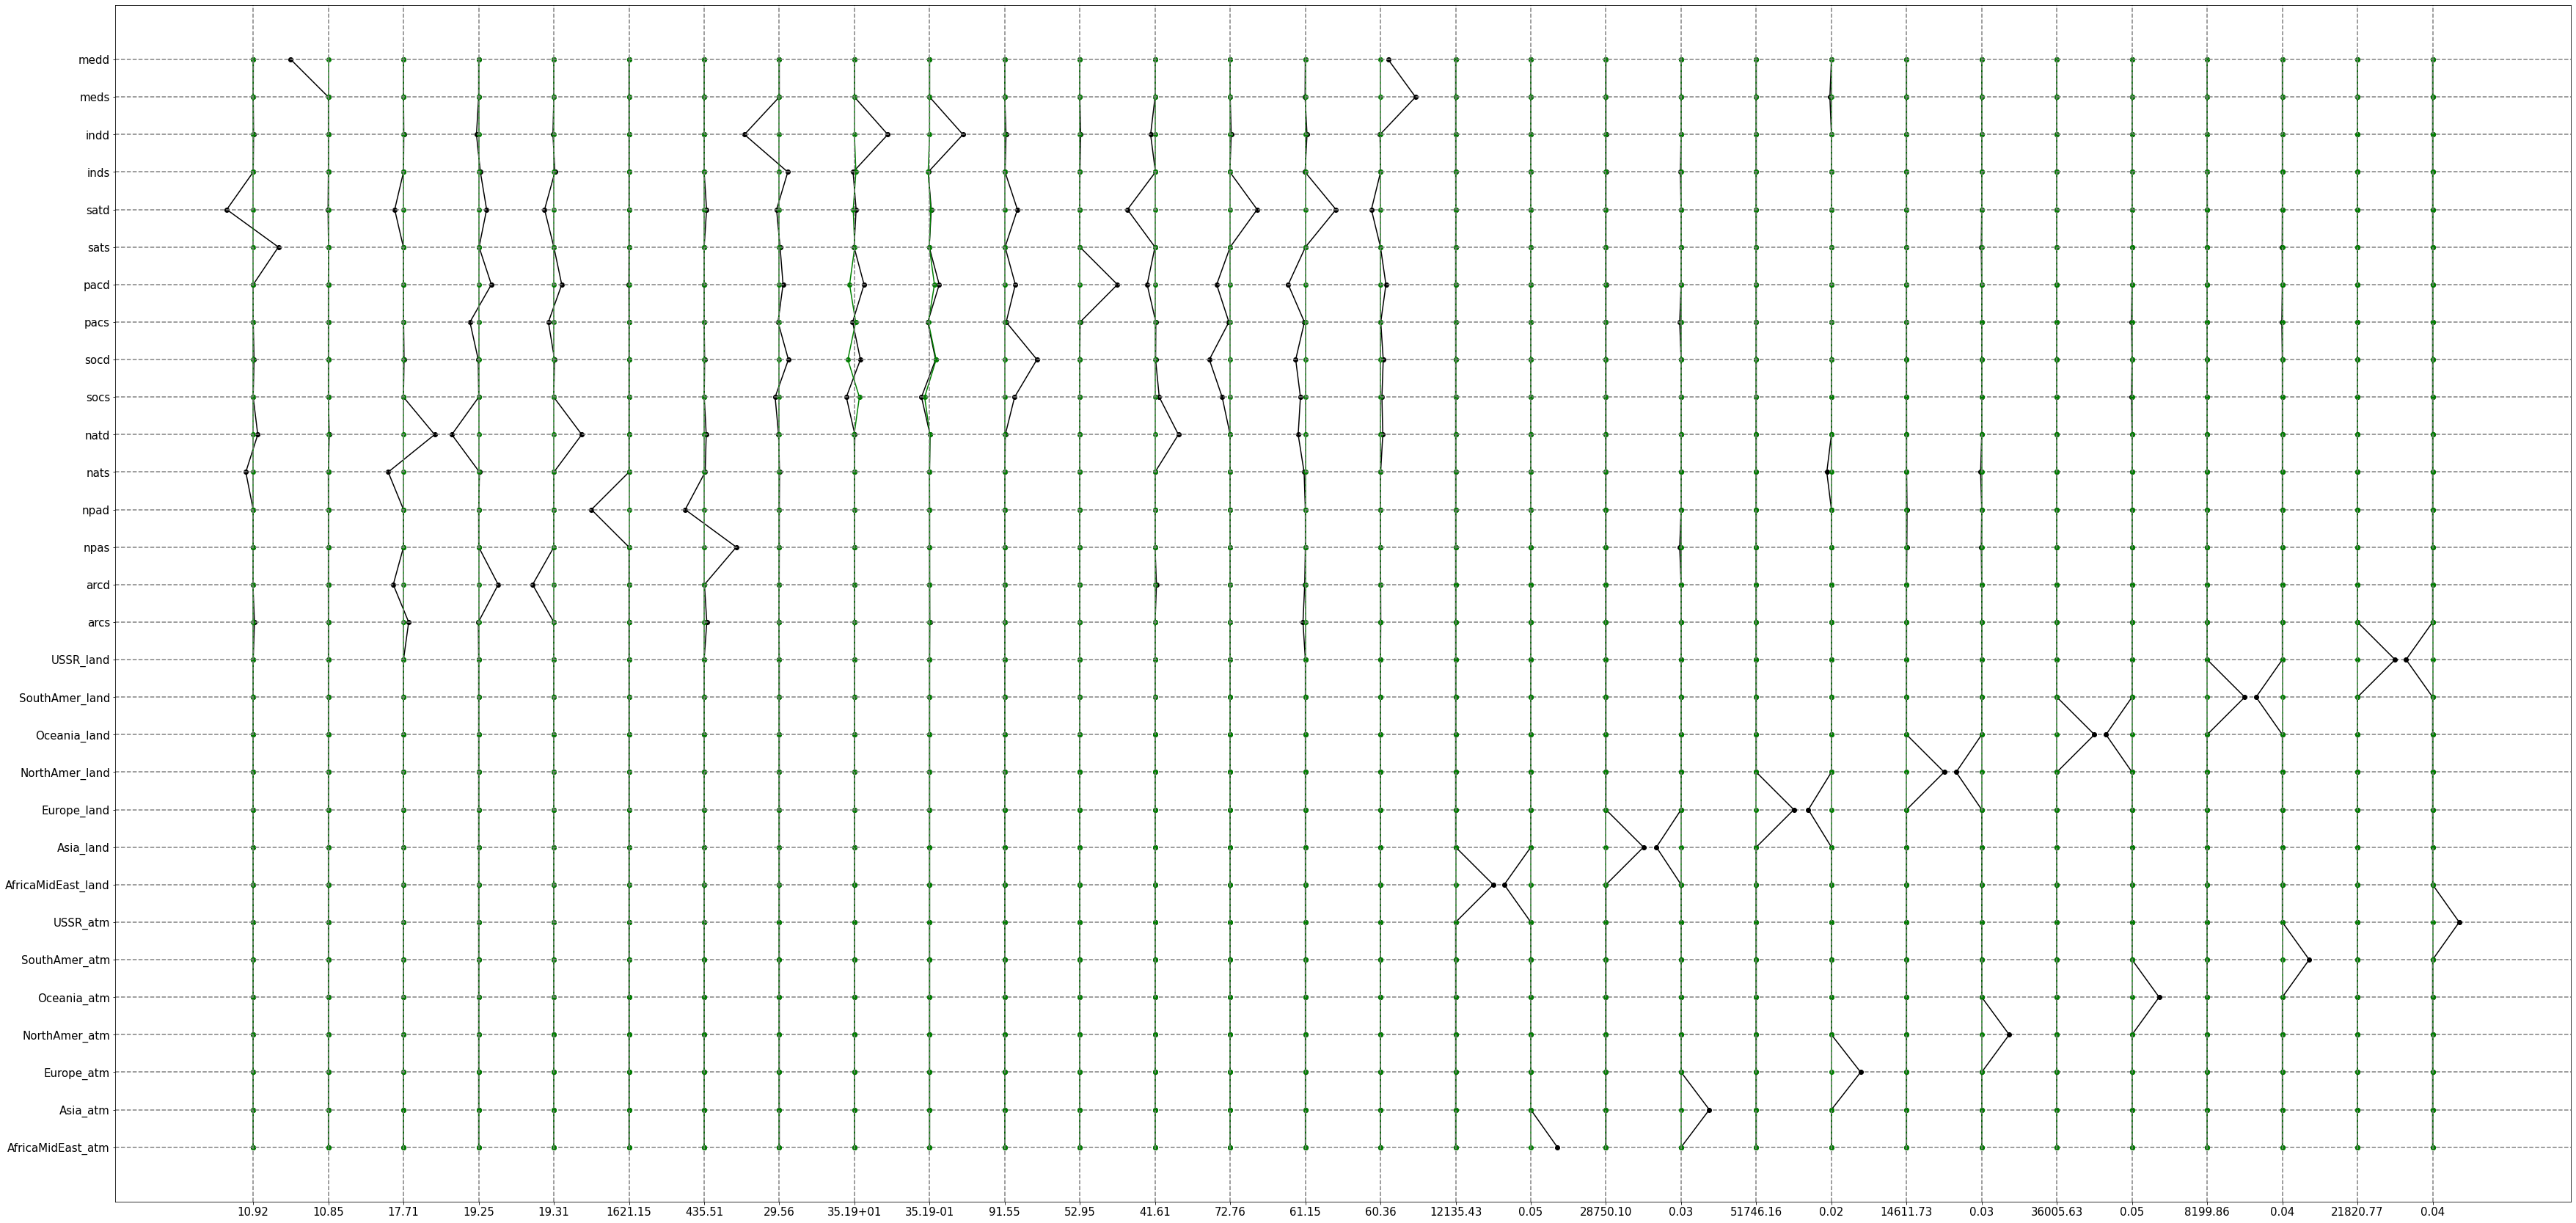

In [11]:
vals, vecs, tscales, restimes = model.eigen()
eigen_analysis_plot(vals,vecs,model.compartments)

In [12]:
for box,res in zip(model.compartments, restimes):
    print(f'Residence time in {box} is {res:.2f} years')

Residence time in AfricaMidEast_atm is 0.05 years
Residence time in Asia_atm is 0.03 years
Residence time in Europe_atm is 0.02 years
Residence time in NorthAmer_atm is 0.03 years
Residence time in Oceania_atm is 0.05 years
Residence time in SouthAmer_atm is 0.04 years
Residence time in USSR_atm is 0.04 years
Residence time in AfricaMidEast_land is 12135.43 years
Residence time in Asia_land is 28750.10 years
Residence time in Europe_land is 51746.16 years
Residence time in NorthAmer_land is 14611.73 years
Residence time in Oceania_land is 36005.63 years
Residence time in SouthAmer_land is 8199.86 years
Residence time in USSR_land is 21820.77 years
Residence time in arcs is 44.72 years
Residence time in arcd is 20.10 years
Residence time in npas is 435.49 years
Residence time in npad is 1621.14 years
Residence time in nats is 19.83 years
Residence time in natd is 38.36 years
Residence time in socs is 40.65 years
Residence time in socd is 58.43 years
Residence time in pacs is 19.40 years

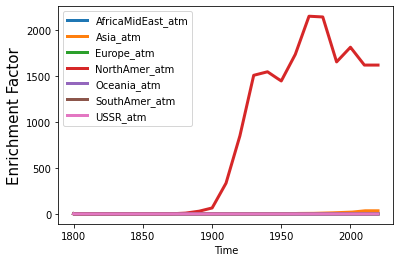

In [13]:
# Example of using a subset of the emissions by name
model.choose_emis_to_use(['Asia coal', 'NorthAmer oil'])
reservoirs, times = model.run(1800, 2020, initial_conditions=Meq)
EFs = reservoirs/reservoirs[0,:]
for comp in global_atmospheres:
    i = global_compartments.index(comp)
    plt.plot(times, EFs[:,i], lw=3, label=comp)
plt.xlabel("Time"); plt.ylabel("Enrichment Factor",fontsize=15);
plt.legend();